In [9]:
import os
import random
import numpy as np
import skimage
import tensorflow
from skimage.color import colorconv
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, Rescaling
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils

print("Dependencies imported.")

Dependencies imported.


In [2]:
print("Preparing Training Data...")
print("Loading images from disk...")

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    classes = []
    k = 0
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f)
                      for f in os.listdir(label_directory)
                      if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(k)
            classes.append(d)
        k += 1
    return images, labels, set(classes)

ROOT_PATH = ""
train_data_directory = os.path.join(ROOT_PATH, "cifar10/train")
test_data_directory = os.path.join(ROOT_PATH, "cifar10/test")

train_images, train_labels, train_classes = load_data(train_data_directory)
test_images, test_labels, test_classes = load_data(test_data_directory)

train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

Preparing Training Data...
Loading images from disk...


In [3]:
print("Loaded {0} training images".format(len(train_images)))
print("Loaded {0} test images".format(len(test_images)))
print("Loaded {0} classes: {1}".format(len(set(test_classes)), set(test_classes)) )

Loaded 50000 training images
Loaded 10000 test images
Loaded 10 classes: {'automobile', 'dog', 'horse', 'deer', 'truck', 'bird', 'airplane', 'frog', 'ship', 'cat'}


In [4]:
print("Converting images to grayscale...")

def prepare_data(images):
  grayscale_images = []
  for i in range(0, len(images)):
    grayscale_images.append(colorconv.rgb2gray(images[i]))
  print("Converted {0} images to grayscale.".format(len(images)))
  return grayscale_images

train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

train_images = train_images.reshape((len(train_images)), 32, 32, 3)
test_images = test_images.reshape((len(test_images)), 32, 32, 3)

print("Training Data Prepared")

Converting images to grayscale...
Training Data Prepared


Showing 8 random sample images


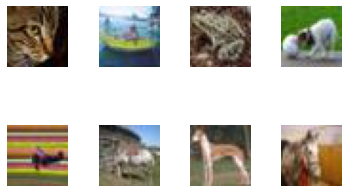

In [5]:
print("Showing 8 random sample images")
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(train_images[random.randint(0, len(train_images))], cmap="gray")
    plt.subplots_adjust(wspace=0.5)

In [40]:
print("Preparing Model...")
num_classes = 10
inputShape = (None, 32, 32, 3)

model = Sequential([
  Rescaling(1./255),
  Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu'),
  MaxPooling2D(pool_size=(4,4)),
  Conv2D(128, 3, input_shape=(8, 8, 3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(32, activation='relu'),
  Dense(num_classes, activation="softmax")
])

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.build(inputShape)

model.summary()
print("Model input shape = {0}".format(model.input_shape))
print("Model output shape = {0}".format(model.output_shape))
print("Data shape = {0}".format(train_images.shape))
print("Labels shape = {0}".format(train_labels.shape))
print("Model prepared.")

Preparing Model...
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_14 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 128)         36992     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None

In [42]:
EPOCHS = 10
FINISHED_FILE_NAME = "Model"
print("Training...")

model.fit(x = train_images,
          y = train_labels,
          # steps_per_epoch=1000,
          # batch_size=32,
          epochs=EPOCHS,
          verbose=1)
print("Training finished.")

model.save(FINISHED_FILE_NAME)
print("Model saved as {0}.".format(FINISHED_FILE_NAME))

Training...
Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7911 - accuracy: 0.6682

313/313 [==============================] - 1s 3ms/step - loss: 1.8507 - accuracy: 0.6082

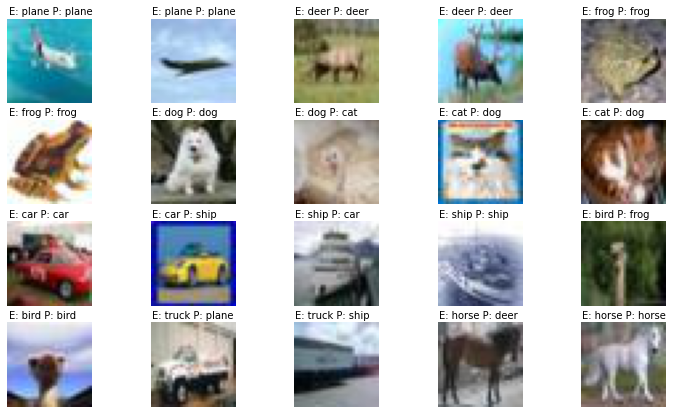

In [240]:
TEST_OFFSET = random.randint(0, 500)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

model.evaluate(test_images, test_labels, verbose=1)

predictions = model.predict(test_images)
images = test_images[TEST_OFFSET::500]
pred = np.argmax(predictions, axis = 1)[TEST_OFFSET::500]
label = np.argmax(test_labels, axis = 1)[TEST_OFFSET::500]

print(pred)
print(label)
classes = ["plane", "deer", "frog", "dog", "cat", "car", "ship", "bird", "truck", "horse"]
classes_wrong = list(test_classes)
print(classes)
print(classes_wrong)
correctNum = 0
for i in range(len(pred)):
  s = "Expected\t{0}\tpredicted\t{1}".format(classes[label[i]][:5], classes[pred[i]][:5])
  if label[i] == pred[i]:
    s += "\tOK"
    correctNum += 1
  else:
    s += "\tERROR"
  print(s)
print("These samples are {0}% correct".format(100*(correctNum/len(pred))))


print("Showing 20 sample images. Offset: {0}".format(TEST_OFFSET))
for i in range(20):
    # r = random.randint(0, len(test_images))
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.text(0, -2, "E: {0} P: {1}".format(classes[label[i]][:5], classes[pred[i]][:5]))
    # plt.text(0, -4, list(test_classes)[np.argmax(predictions[r])])
    plt.imshow(images[i])
    plt.subplots_adjust(wspace=0.5)

